In [4]:
# load PINES dataset
import pandas as pd 

PINES=pd.read_csv('S1_Data.csv')
PINES.head()

,Dataset,Subject,Holdout,SEX,AGE,RACE,YRS_SCH,Files,Picture,Valence,...,C2_PINES,C3_PINES,C4_PINES,C5_PINES,C6_PINES,C7_PINES,C8_PINES,C9_PINES,PINES,PINES_Within
0,IAPS,101,Test,Female,45,Black,12.0,IAPS_Subject_101_Image_3120.nii.gz,3120.0,negative,...,-0.037539,-0.11424,0.029240,0.13733,-0.010321,-0.011871,0.051608,0.173720,2.315800,NaN
1,IAPS,101,Test,Female,45,Black,12.0,IAPS_Subject_101_Image_7490.nii.gz,7490.0,neutral,...,0.049023,-0.23142,-0.051219,0.51538,-0.208780,-0.048254,0.008339,-0.010794,1.161943,NaN
2,IAPS,101,Test,Female,45,Black,12.0,IAPS_Subject_101_Image_7217.nii.gz,7217.0,neutral,...,-0.002759,-0.11421,-0.061456,0.30858,-0.159530,-0.216230,0.105340,-0.049174,0.993450,NaN
3,IAPS,101,Test,Female,45,Black,12.0,IAPS_Subject_101_Image_9810.nii.gz,9810.0,negative,...,-0.199790,-0.10384,-0.140610,0.54502,0.069548,-0.098920,0.022010,-0.032902,2.163300,NaN
4,IAPS,101,Test,Female,45,Black,12.0,IAPS_Subject_101_Image_3051.nii.gz,3051.0,negative,...,-0.102580,-0.23020,0.112400,0.31286,0.154440,-0.084358,0.044058,0.077737,2.959600,NaN


### Target label ($Y$): emotional states
$Y$: participants' responses about their emotional states, numbers between 1 and 5.

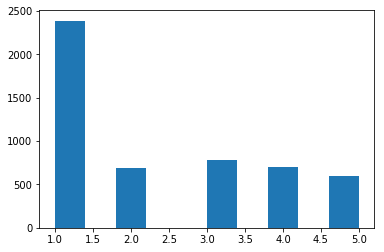

In [13]:
# target label: Participants' response, a number between 1 and 5
Y=PINES['Rating']

# plot histogram of Y
import matplotlib.pyplot as plt
%matplotlib inline  
plt.hist(Y)
plt.show()

## Predictor ($X$): fMRI image

Use fMRI images as a predictor. 

The following shows how to load an fMRI image from a file.

In [14]:
# plot a sample image 
from IPython.display import HTML

imageID = 3647
imageAddress='http://neurovault.org/images/{}'.format(imageID)
HTML('<div id="NeuroVaultPapayaHolder"><script src="' + imageAddress + '/js/embed" type="text/javascript" charset="utf-8"></script></div>')

In [ ]:
# First, download the data file
!wget https://neurovault.org/media/images/503/IAPS_Subject_102_Image_9252.nii.gz

In [9]:
# Next, let's load the data    
import nibabel as nib

# load it
nibFilename = 'IAPS_Subject_102_Image_9252.nii.gz'    
image = nib.load(nibFilename)

print(image.shape) # 79 x 95 x 68 = 510340 pixels
print(image.get_data_dtype()) # float32

# let's convert it to a numpy array!
data = image.get_data()
print(data.shape)


(79, 95, 68)
float32
(79, 95, 68)


In [11]:
# for more detail of the data
??image

## TO DO
Now, you know how to load $Y$ and $X$!

Nest step is build a model for predicting $Y$ from $X$.
When you train a model use data samples $(X,Y)$ with Holdout=Train.
Once your have a model, use the data samples with Holdout=Test.

In [16]:
PINES['Holdout']

0        Test
1        Test
2        Test
3        Test
4        Test
5        Test
6        Test
7        Test
8        Test
9        Test
10       Test
11       Test
12       Test
13       Test
14       Test
15       Test
16       Test
17       Test
18       Test
19       Test
20       Test
21       Test
22       Test
23       Test
24       Test
25       Test
26       Test
27      Train
28      Train
29      Train
        ...  
5121     Test
5122     Test
5123     Test
5124     Test
5125     Test
5126     Test
5127     Test
5128     Test
5129     Test
5130     Test
5131     Test
5132     Test
5133     Test
5134     Test
5135     Test
5136     Test
5137     Test
5138     Test
5139     Test
5140     Test
5141     Test
5142     Test
5143     Test
5144     Test
5145     Test
5146     Test
5147     Test
5148     Test
5149     Test
5150     Test
Name: Holdout, Length: 5151, dtype: object